In [183]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMinMax

In [188]:
# 時系列データのcsvファイルがあるディレクトリのパス
dataset = "/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/tsData2"

In [189]:
tsData = pd.DataFrame(columns=["p_ID", "sprite", "sprNum", "x", "y"])

for pathName, dirName, fileNames in os.walk(dataset):
    for fileName in fileNames:
        if fileName.startswith("."):
            continue
            
        prjId = fileName.rsplit(".")[0]
        
        data = pd.read_csv(dataset + "/" + fileName, usecols=[1, 2, 4, 5])
                
        # 最後にスライスしたインデックスを保持
        sliceNum = 0

        # 同じスプライトで何個目の動きかを保持
        sprNum = 0

        # csvからデータを分ける
        for i in range(1, len(data)):
        # 1.スプライトが変わっている
            if data.at[i, "sprite"] != data.at[i-1, "sprite"]:
                """
                tsData.append({"p_ID": prjId, 
                               "sprite": data.at[i-1, "sprite"], 
                               "num": sprNum, 
                               "data": data[sliceNum:i]})
                """
                
                for j in range(sliceNum, i):
                    addRow = pd.DataFrame([[prjId, data.at[i-1, "sprite"], sprNum, data.at[j, "x"], data.at[j, "y"]]], columns=["p_ID", "sprite", "sprNum", "x", "y"])
                    tsData = tsData.append(addRow)

                sliceNum = i
                sprNum = 0
        
        # 2.フレームから一旦消え，別のフレームでまた復活している
            elif data.at[i, "time"] != data.at[i-1, "time"] + 1:
                """
                tsData.append({"p_ID": prjId, 
                               "sprite": data.at[i-1, "sprite"], 
                               "num": sprNum, 
                               "data": data[sliceNum:i]})
                """
                
                for j in range(sliceNum, i):
                    addRow = pd.DataFrame([[prjId, data.at[i-1, "sprite"], sprNum, data.at[j, "x"], data.at[j, "y"]]], columns=["p_ID", "sprite", "sprNum", "x", "y"])
                    tsData = tsData.append(addRow)
                    
                sliceNum = i
                sprNum += 1
                
        for i in range(sliceNum, len(data)):
            """
            tsData.append({"p_ID": prjId, 
                            "sprite": data.at[len(data)-1, "sprite"], 
                            "num": sprNum, 
                            "data": data[sliceNum:]})
            """
            addRow = pd.DataFrame([[prjId, data.at[len(data)-1, "sprite"], sprNum, data.at[i, "x"], data.at[i, "y"]]], columns=["p_ID", "sprite", "sprNum", "x", "y"])
            tsData = tsData.append(addRow)
            

#for d in tsData:
 #   print(d)
    # print(type(d["data"]))

print(tsData)

       p_ID         sprite sprNum        x          y
0  99158842            Cat      0   250.25     180.00
0  99158842            Cat      0   290.25     180.00
0  99158842            Cat      1   380.25     180.00
0  99158842            Cat      2    59.75     305.25
0  99158842            Cat      2    59.75     305.25
0  99158842            Cat      2    59.75     305.25
0  99158842            Cat      2    59.75     305.25
0  99158842            Cat      2    59.75     305.50
0  99158842            Cat      2    59.75     305.50
0  99158842            Cat      2    59.75     305.50
0  99158842            Cat      2    59.75     305.50
0  99158842            Cat      2    59.75     305.50
0  99158842            Cat      2    59.75     305.50
0  99158842            Cat      2    59.75     305.50
0  99158842            Cat      2    59.75     305.50
0  99158842            Cat      2    89.75     305.75
0  99158842            Cat      2   129.75     305.75
0  99158842            Cat  

In [190]:
# 多次元連想配列に切り分けたデータを保持
tsData = pd.DataFrame(columns=["prjId_sprite_sprNum", "time", "x", "y"])

for pathName, dirName, fileNames in os.walk(dataset):
    for fileName in fileNames:
        if fileName.startswith("."):
            continue
            
        prjId = fileName.rsplit(".")[0]
        
        data = pd.read_csv(dataset + "/" + fileName, usecols=[0, 1, 2, 4, 5])
                
        # 最後にスライスしたインデックスを保持
        sliceNum = 0

        # 同じスプライトで何個目の動きかを保持
        sprNum = 0

        # csvからデータを分ける
        for i in range(1, len(data)):
        # 1.スプライトが変わっている
            if data.at[i, "sprite"] != data.at[i-1, "sprite"]:
                for j in range(sliceNum, i):
                    addRow = pd.DataFrame([[prjId + "_" + data.at[i-1, "sprite"] + "_" + str(sprNum), data.at[j, "time"], data.at[j, "x"], data.at[j, "y"]]], columns=["prjId_sprite_sprNum", "time", "x", "y"])
                    tsData = tsData.append(addRow)
                sliceNum = i
                sprNum = 0
        
        # 2.フレームから一旦消え，別のフレームでまた復活している
            elif data.at[i, "time"] != data.at[i-1, "time"] + 1:
                for j in range(sliceNum, i):
                    addRow = pd.DataFrame([[prjId + "_" + data.at[i-1, "sprite"] + "_" + str(sprNum), data.at[j, "time"], data.at[j, "x"], data.at[j, "y"]]], columns=["prjId_sprite_sprNum", "time", "x", "y"])
                    tsData = tsData.append(addRow)
                sliceNum = i
                sprNum += 1
                
        for i in range(sliceNum, len(data)):
            addRow = pd.DataFrame([[prjId + "_" + data.at[len(data)-1, "sprite"] + "_" + str(sprNum), data.at[i, "time"], data.at[i, "x"], data.at[i, "y"]]], columns=["prjId_sprite_sprNum", "time", "x", "y"])
            tsData = tsData.append(addRow)
            
print(len(tsData["prjId_sprite_sprNum"].unique()))

685


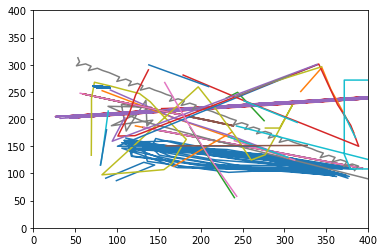

61


In [104]:
# 全動作の動きを描画してみる
count = 0
for num in tsData["prjId_sprite_sprNum"].unique():
    count+=1
    plt.plot(tsData[tsData["prjId_sprite_sprNum"]==num]["x"], tsData[tsData["prjId_sprite_sprNum"]==num]["y"])
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.show()
print(count)

In [106]:
# 各動作をクラスタリング
coors = []
for num in tsData["prjId_sprite_sprNum"].unique():
    addCoor = np.array(tsData[tsData["prjId_sprite_sprNum"]==num][["x","y"]])
    if len(addCoor) <= 1:
        continue
    coors.append(addCoor)
    
print(len(tsData["prjId_sprite_sprNum"].unique()))

coors = TimeSeriesScalerMinMax().fit_transform(to_time_series_dataset(coors))

dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=5,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=22)

pred = dba_km.fit_predict(coors)

colors = ["blue","yellow","green","red"]
c0 = []
c1 = []
c2 = []

for num,c in zip(tsData["prjId_sprite_sprNum"].unique(),pred):
    if c==0:
        c0.append(np.array(tsData[tsData["prjId_sprite_sprNum"]==num][["prjId_sprite_sprNum","time","x","y"]]))
    elif c==1:
        c1.append(np.array(tsData[tsData["prjId_sprite_sprNum"]==num][["prjId_sprite_sprNum","time","x","y"]]))
    elif c==2:
        c2.append(np.array(tsData[tsData["prjId_sprite_sprNum"]==num][["prjId_sprite_sprNum","time","x","y"]]))
    elif c==3:
        c3.append(np.array(tsData[tsData["prjId_sprite_sprNum"]==num][["prjId_sprite_sprNum","time","x","y"]]))     

61


クラスター１


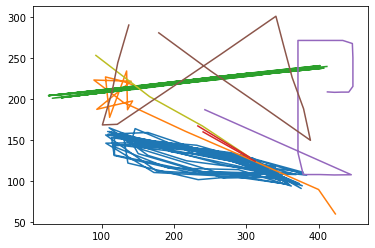

In [109]:
print("クラスター１")
for c in c0:
    # print(c)
    x0 = np.array([])
    y0 = np.array([])
    for d in c:
        x0 = np.append(x0, d[2])
        y0 = np.append(y0, d[3])
    plt.plot(x0, y0)

クラスター2


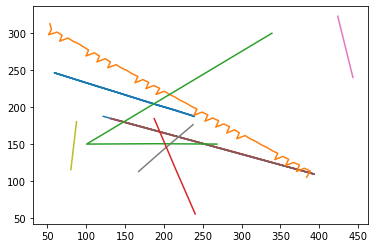

In [110]:
print("クラスター2")
for c in c1:
    # print(c)
    x1 = np.array([])
    y1 = np.array([])
    for d in c:
        x1 = np.append(x1, d[2])
        y1 = np.append(y1, d[3])
    plt.plot(x1, y1)

クラスター３


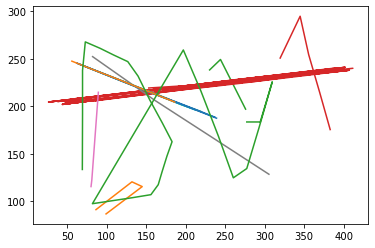

In [111]:
print("クラスター３")
for c in c2:
    # print(c)
    x2 = np.array([])
    y2 = np.array([])
    for d in c:
        x2 = np.append(x2, d[2])
        y2 = np.append(y2, d[3])
    plt.plot(x2, y2)

In [114]:
pd.set_option('display.max_rows', None)
print(resultX == resultY)

   prjId_sprite_sprNum  time  cluster
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0                 True  True     True
0           

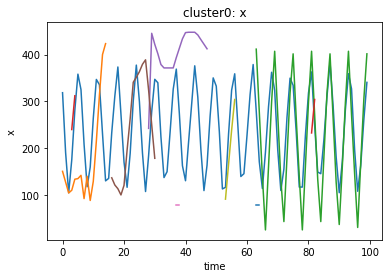

In [165]:
for c in c0:
    # print(c)
    t0 = np.array([])
    x0 = np.array([])
    for d in c:
        t0 = np.append(t0, d[1])
        x0 = np.append(x0, d[2])
    plt.xlabel("time")
    plt.ylabel("x")
    plt.title("cluster0: x")
    plt.plot(t0, x0)

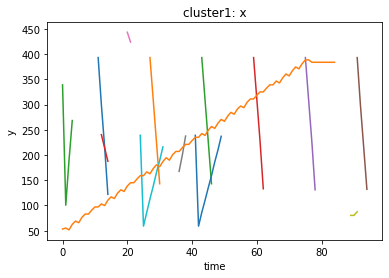

In [168]:
for c in c1:
    # print(c)
    t1 = np.array([])
    x1 = np.array([])
    for d in c:
        t1 = np.append(t1, d[1])
        x1 = np.append(x1, d[2])
    plt.xlabel("time")
    plt.ylabel("y")
    plt.title("cluster1: x")
    plt.plot(t1, x1)

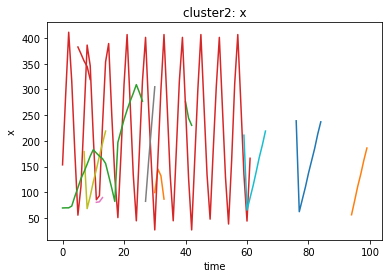

In [169]:
for c in c2:
    # print(c)
    t2 = np.array([])
    x2 = np.array([])
    for d in c:
        t2 = np.append(t2, d[1])
        x2 = np.append(x2, d[2])
    plt.xlabel("time")
    plt.ylabel("x")
    plt.title("cluster2: x")
    plt.plot(t2, x2)

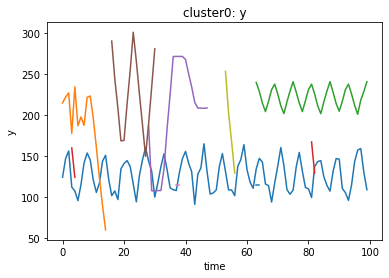

In [170]:
for c in c0:
    # print(c)
    t0 = np.array([])
    y0 = np.array([])
    for d in c:
        t0 = np.append(t0, d[1])
        y0 = np.append(y0, d[3])
    plt.xlabel("time")
    plt.ylabel("y")
    plt.title("cluster0: y")
    plt.plot(t0, y0)

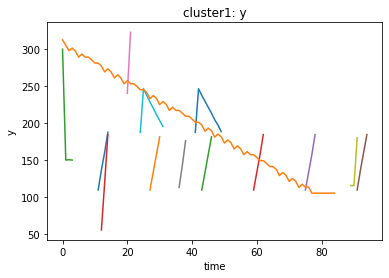

In [171]:
for c in c1:
    # print(c)
    t1 = np.array([])
    y1 = np.array([])
    for d in c:
        t1 = np.append(t1, d[1])
        y1 = np.append(y1, d[3])
    plt.xlabel("time")
    plt.ylabel("y")
    plt.title("cluster1: y")
    plt.plot(t1, y1)

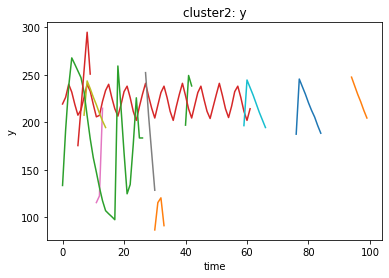

In [172]:
for c in c2:
    # print(c)
    t2 = np.array([])
    y2 = np.array([])
    for d in c:
        t2 = np.append(t2, d[1])
        y2 = np.append(y2, d[3])
    plt.xlabel("time")
    plt.ylabel("y")
    plt.title("cluster2: y")
    plt.plot(t2, y2)

In [112]:
# xとyを分けてクラスタリング
x = []
y = []
for num in tsData["prjId_sprite_sprNum"].unique():
    addX = tsData[tsData["prjId_sprite_sprNum"]==num]["x"]
    addY = tsData[tsData["prjId_sprite_sprNum"]==num]["y"]
    if len(tsData[tsData["prjId_sprite_sprNum"]==num][["x","y"]]) <= 1:
        continue
    x.append(addX)
    y.append(addY)
    
x = TimeSeriesScalerMinMax().fit_transform(to_time_series_dataset(x))
y = TimeSeriesScalerMinMax().fit_transform(to_time_series_dataset(y))

dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=5,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=22)

predX = dba_km.fit_predict(x)
predY = dba_km.fit_predict(y)

cx0 = []
cx1 = []
cx2 = []

cy0 = []
cy1 = []
cy2 = []

resultX = pd.DataFrame(columns=["prjId_sprite_sprNum", "time", "cluster"])
resultY = pd.DataFrame(columns=["prjId_sprite_sprNum", "time", "cluster"])

for num, c in zip(tsData["prjId_sprite_sprNum"].unique(),predX):
    for t in tsData[tsData["prjId_sprite_sprNum"]==num]["time"]:
        addResult = pd.DataFrame([[num, t, c]], columns=["prjId_sprite_sprNum", "time", "cluster"])        
        resultX = resultX.append(addResult)
    
for num, c in zip(tsData["prjId_sprite_sprNum"].unique(),predY):
    for t in tsData[tsData["prjId_sprite_sprNum"]==num]["time"]:
        addResult = pd.DataFrame([[num, t, c]], columns=["prjId_sprite_sprNum", "time", "cluster"])
        resultY = resultY.append(addResult)

In [179]:
# 各動作をクラスタリング
coors = []
for num in tsData["prjId_sprite_sprNum"].unique():
    addCoor = np.array(tsData[tsData["prjId_sprite_sprNum"]==num][["x","y"]])
    if len(addCoor) <= 1:
        continue
    coors.append(addCoor)
    
# print(len(tsData["prjId_sprite_sprNum"].unique()))

coors = TimeSeriesScalerMinMax().fit_transform(to_time_series_dataset(coors))

# クラスタ数
nc = 5

dba_km = TimeSeriesKMeans(n_clusters=nc,
                          n_init=5,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=22)

pred = dba_km.fit_predict(coors)

colors = ["blue","yellow","green","red"]

cr = []

for i in range(nc):
    cr.append([])
    
for num,c in zip(tsData["prjId_sprite_sprNum"].unique(),pred):
    cr[c].append(np.array(tsData[tsData["prjId_sprite_sprNum"]==num][["prjId_sprite_sprNum","time","x","y"]]))      

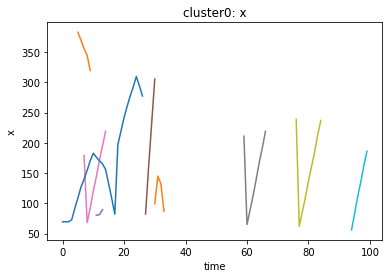

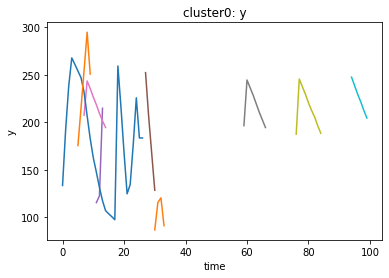

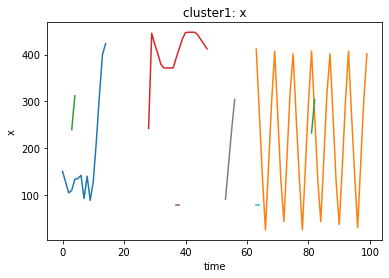

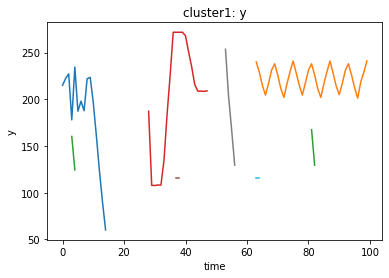

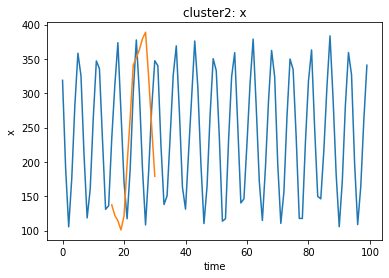

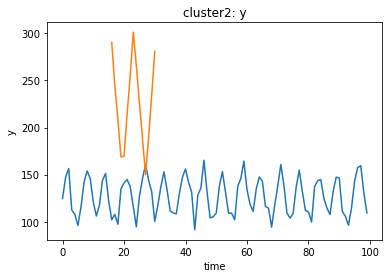

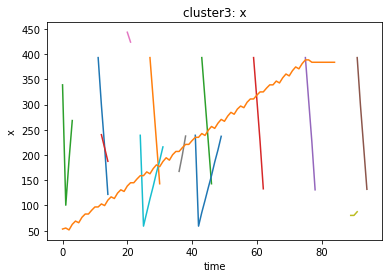

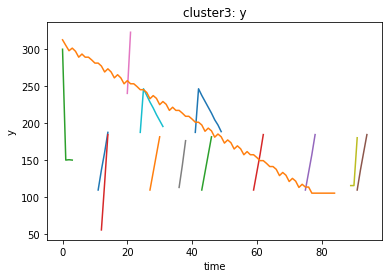

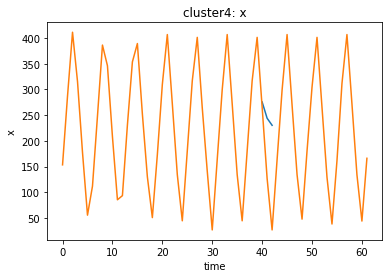

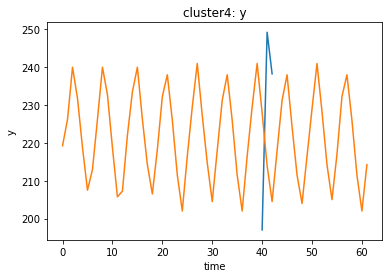

In [180]:
for i in range(len(cr)):
    for j in range(2):
        plt.figure()
        for r in cr[i]:
            t = np.array([])
            v = np.array([])
            vType = ""
            for d in r:
                t = np.append(t, d[1])
                v = np.append(v, d[j + 2])
            if j == 0:
                vType = "x"
                plt.title("cluster" + str(i) + ": " + vType)
                plt.ylabel(vType)
            else:
                vType = "y"
                plt.title("cluster" + str(i) + ": " + vType)
                plt.ylabel(vType)
            plt.xlabel("time")
            plt.plot(t, v)
            plt.savefig("nc_" + str(nc) + "cluster" + str(i) + "_" + vType)